In [2]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd 
from sklearn.metrics import classification_report,accuracy_score

dataset=pd.read_csv("archive (4)\diabetes.csv")

In [3]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


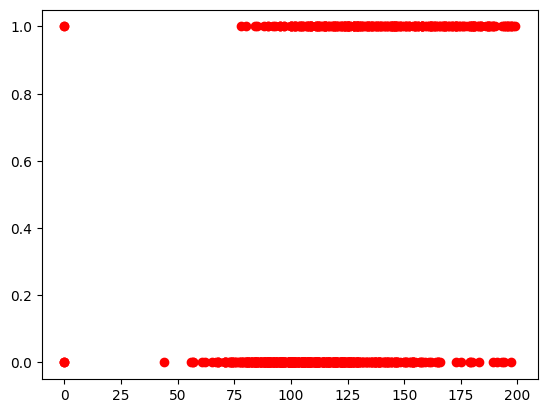

In [22]:
import matplotlib.pyplot as plt

plt.scatter(dataset["Glucose"],dataset["Outcome"],color="Red")

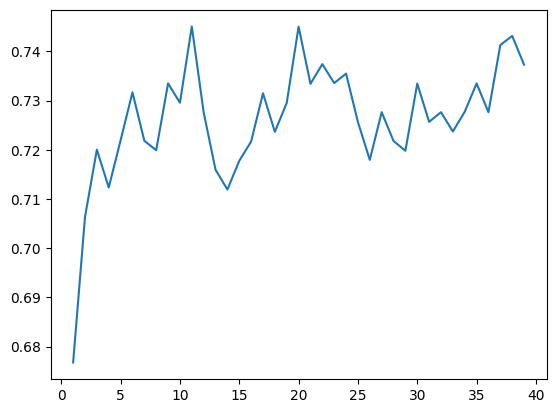

In [52]:
X=dataset.drop("Outcome",axis=1).values
y=dataset["Outcome"].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33)
from sklearn.model_selection import cross_val_score

accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train, cv=10)
    accuracy_rate.append(score.mean())

import matplotlib.pyplot as plt 

plt.plot(np.arange(1,40),accuracy_rate)

In [46]:
model = KNeighborsClassifier(n_neighbors=40)
# score = cross_val_score(knn, X_train, y_train, cv=10)
#     # error_rate.append(1-score.mean())
# print(score)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [47]:
X_test

array([[6.00e+00, 9.80e+01, 5.80e+01, ..., 3.40e+01, 4.30e-01, 4.30e+01],
       [2.00e+00, 1.12e+02, 7.50e+01, ..., 3.57e+01, 1.48e-01, 2.10e+01],
       [2.00e+00, 1.08e+02, 6.40e+01, ..., 3.08e+01, 1.58e-01, 2.10e+01],
       ...,
       [1.00e+00, 0.00e+00, 7.40e+01, ..., 2.77e+01, 2.99e-01, 2.10e+01],
       [8.00e+00, 1.43e+02, 6.60e+01, ..., 3.49e+01, 1.29e-01, 4.10e+01],
       [2.00e+00, 1.01e+02, 5.80e+01, ..., 2.42e+01, 6.14e-01, 2.30e+01]])

In [48]:
y_pred=model.predict(X_test)

In [49]:
accuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
report=classification_report(y_true=y_test,y_pred=y_pred)

In [50]:
print(accuracy)

0.7322834645669292


In [51]:
print(report)

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       168
           1       0.66      0.43      0.52        86

    accuracy                           0.73       254
   macro avg       0.71      0.66      0.67       254
weighted avg       0.72      0.73      0.71       254

